# Imports

## Import gen

In [15]:
import pandas as pd
import os,sys
import pickle
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import keras_tuner as kt
from IPython.display import clear_output

In [17]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Import Sklearn

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml

## Import Keras

In [19]:
from keras.models import Sequential
from keras.layers import Dense

## Import dataset

Read from file or if file do not exist get from openml

In [20]:
path_to_file = '../data/saved_dictionary.pkl'

In [21]:
if os.path.exists(path_to_file):
    print('Getting data set from local')
    with open(path_to_file, 'rb') as f:
        minst = pickle.load(f)
else:
    print('Getting data set from openML')
    minst = fetch_openml('mnist_784')
    with open(path_to_file, 'wb') as f:
        pickle.dump(minst, f)
print(f'{sys.getsizeof(minst)}')

Getting data set from local
376


In [22]:
minst.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [23]:
X,y = minst['data'],minst['target']

# Split train test

In [24]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

# Visualisation des chiffres

In [25]:
X_train.shape

(60000, 784)

In [26]:
def show_image(dataset,dataset_label,indice):
    label = dataset_label.iloc[indice]
    values = dataset.iloc[indice].values
    img = values.reshape(28,28)
    plt.imshow(img,cmap='binary')
    plt.axis('off')
    plt.title(f'Label :{label}')
    plt.show()

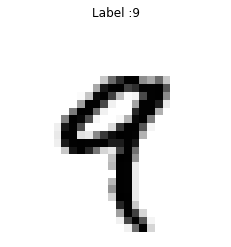

In [28]:
for i in range(5):
    show_image(X_train,y_train,i)
    clear_output(wait=True)

# Test model neuronal 'simple' 

- input => 784  
- 2 hidden layers of 10-20 neurons
- 1 output layer of with 10 neurons => one by class 

In [29]:
simple_model = Sequential(
    [
        Dense(16,activation='relu',input_shape=(784,)),
        Dense(14,activation='relu'),
        Dense(10,activation='sigmoid',name='output_layer'),
    ]
)

2022-06-16 09:51:15.566588: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-06-16 09:51:15.567129: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:61:00.0 name: NVIDIA GeForce GTX 1660 computeCapability: 7.5
coreClock: 1.785GHz coreCount: 22 deviceMemorySize: 5.80GiB deviceMemoryBandwidth: 178.86GiB/s
2022-06-16 09:51:15.567188: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-06-16 09:51:15.567228: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-06-16 09:51:15.567247: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2022-06-16 09:51:15.567266: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcufft.so

InternalError: CUDA runtime implicit initialization on GPU:0 failed. Status: out of memory